In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

In [2]:
A = np.array([[0,1],[-1,0]])
campo = lambda x : A@x
soluzione = lambda t,x0 : expm(A*t)@x0

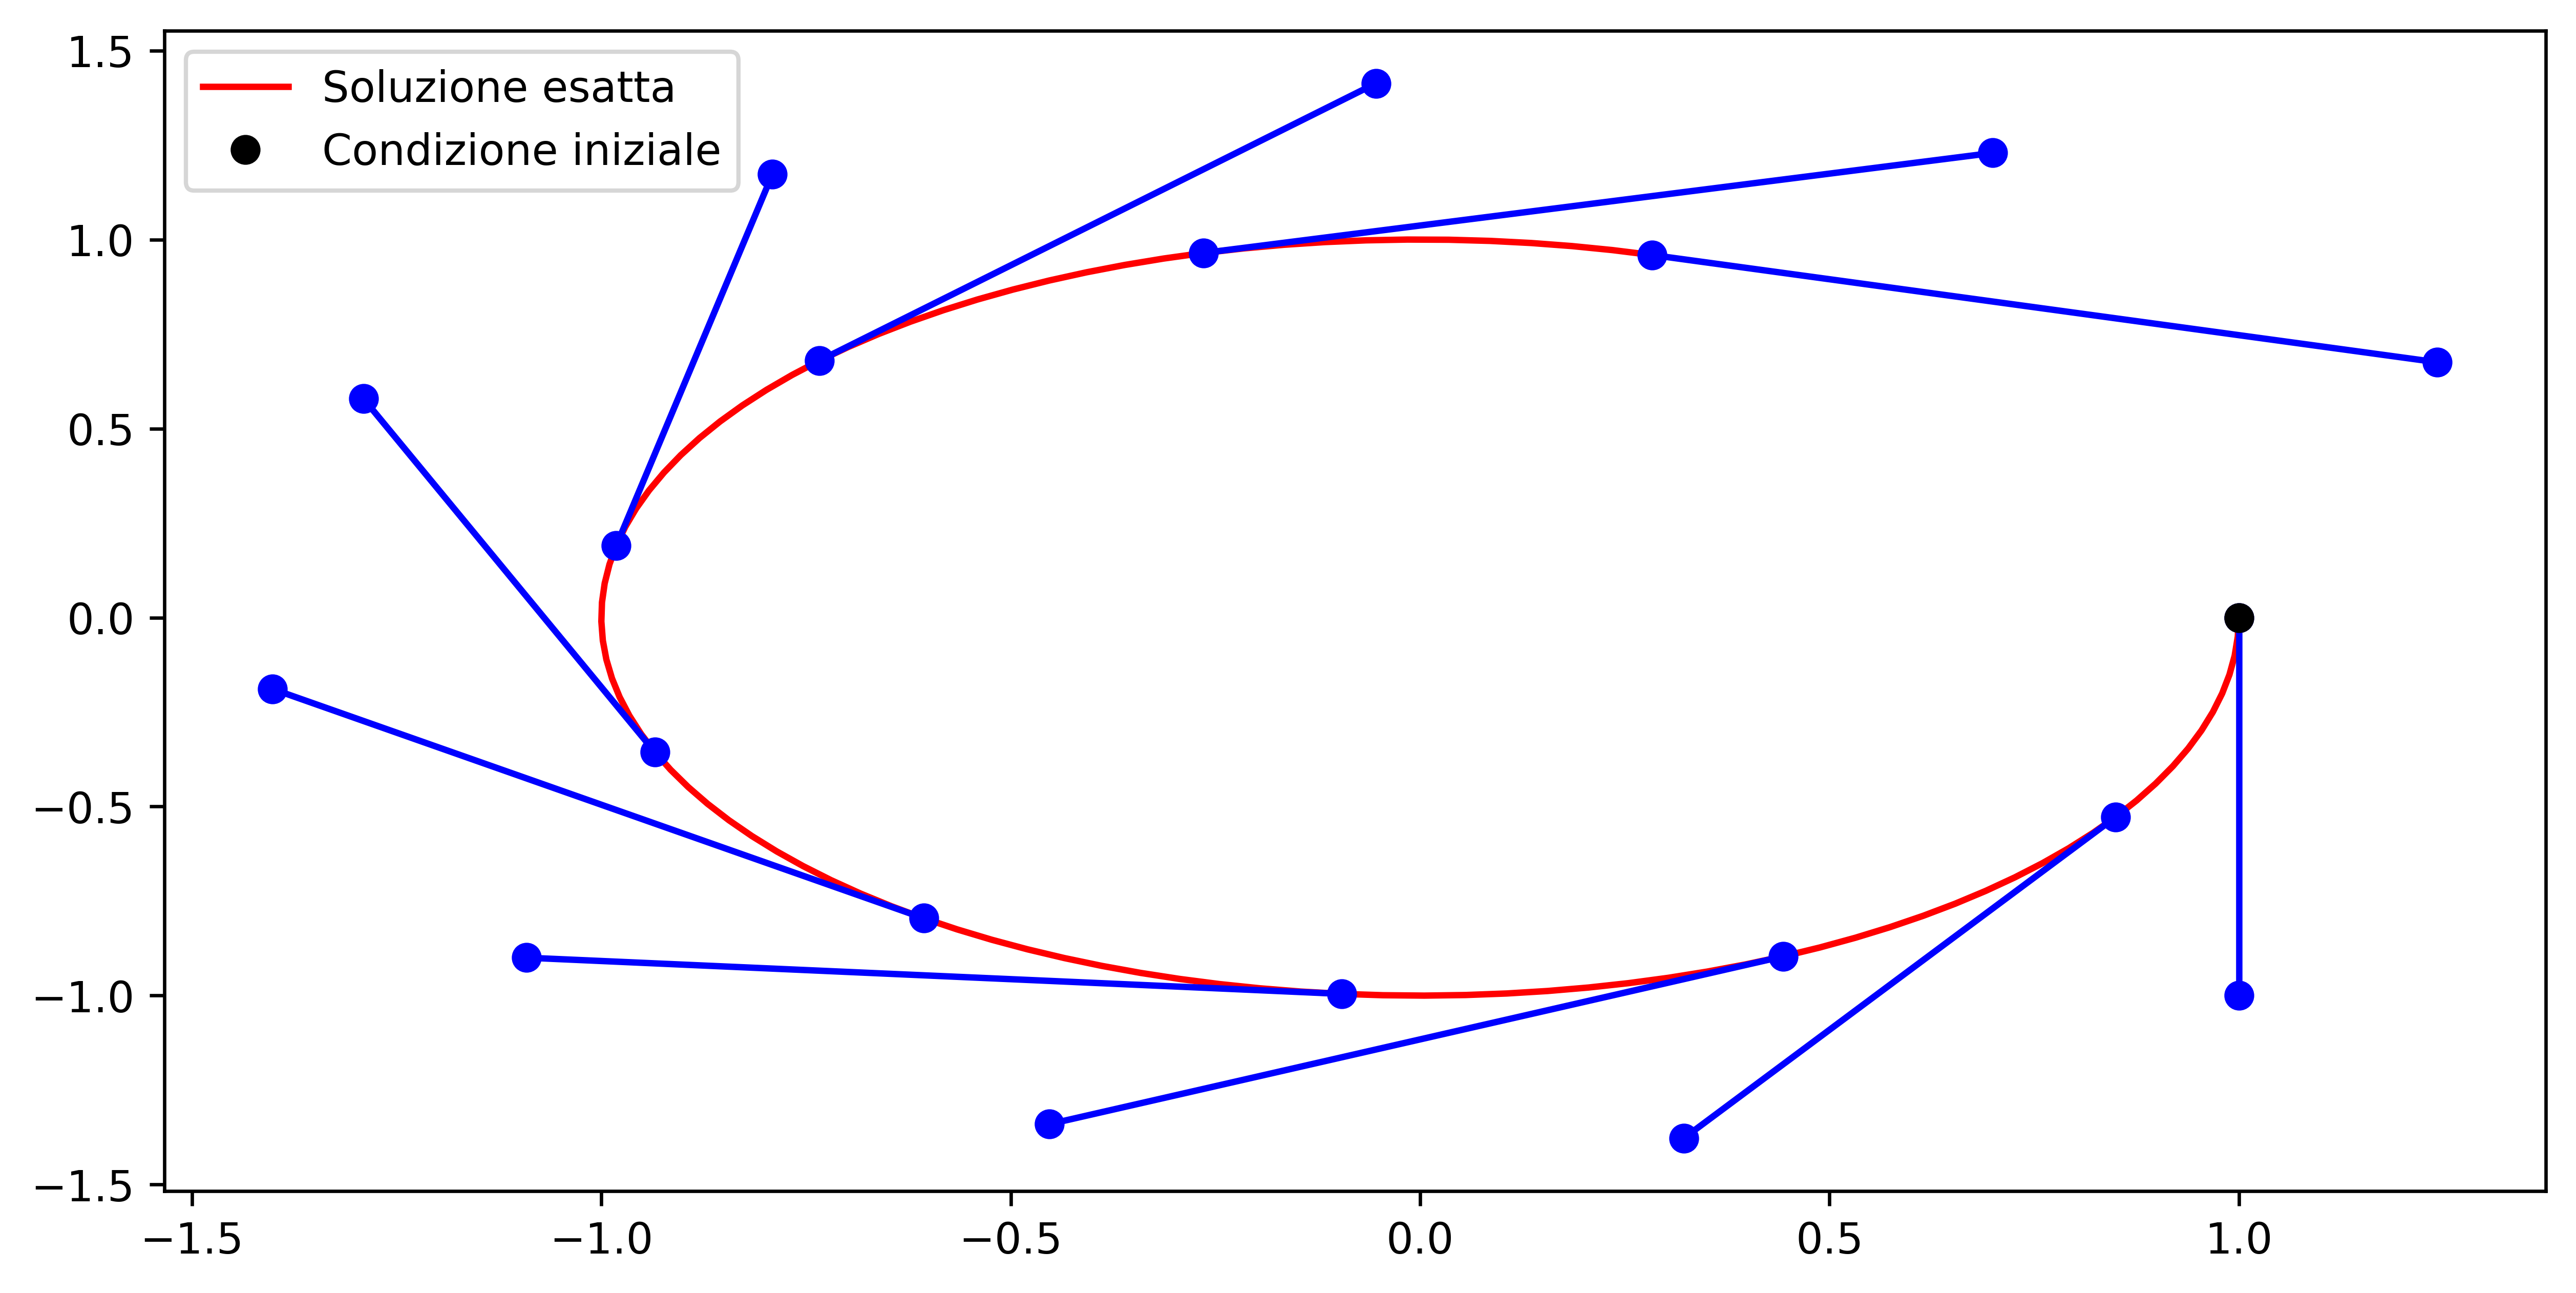

In [3]:
x0 = np.array([1.,0])
t = np.linspace(0,5,100)
sol = np.array([soluzione(t[i],x0) for i in range(len(t))])
fig = plt.figure(figsize=(10,5),dpi=600)
tSparse = np.linspace(0,5,10)
vec = np.array([campo(soluzione(tt,x0)) for tt in tSparse])
plt.plot(sol[:,0],sol[:,1],'r-',label="Soluzione esatta")

for i,tt in enumerate(tSparse):
  pos1 = soluzione(tt,x0)
  pos2 = pos1 + vec[i]
  plt.plot([pos1[0],pos2[0]],[pos1[1],pos2[1]],'bo-')
plt.plot(x0[0],x0[1],'ko',label="Condizione iniziale")
plt.legend()


### Esempio con Eulero Esplicito

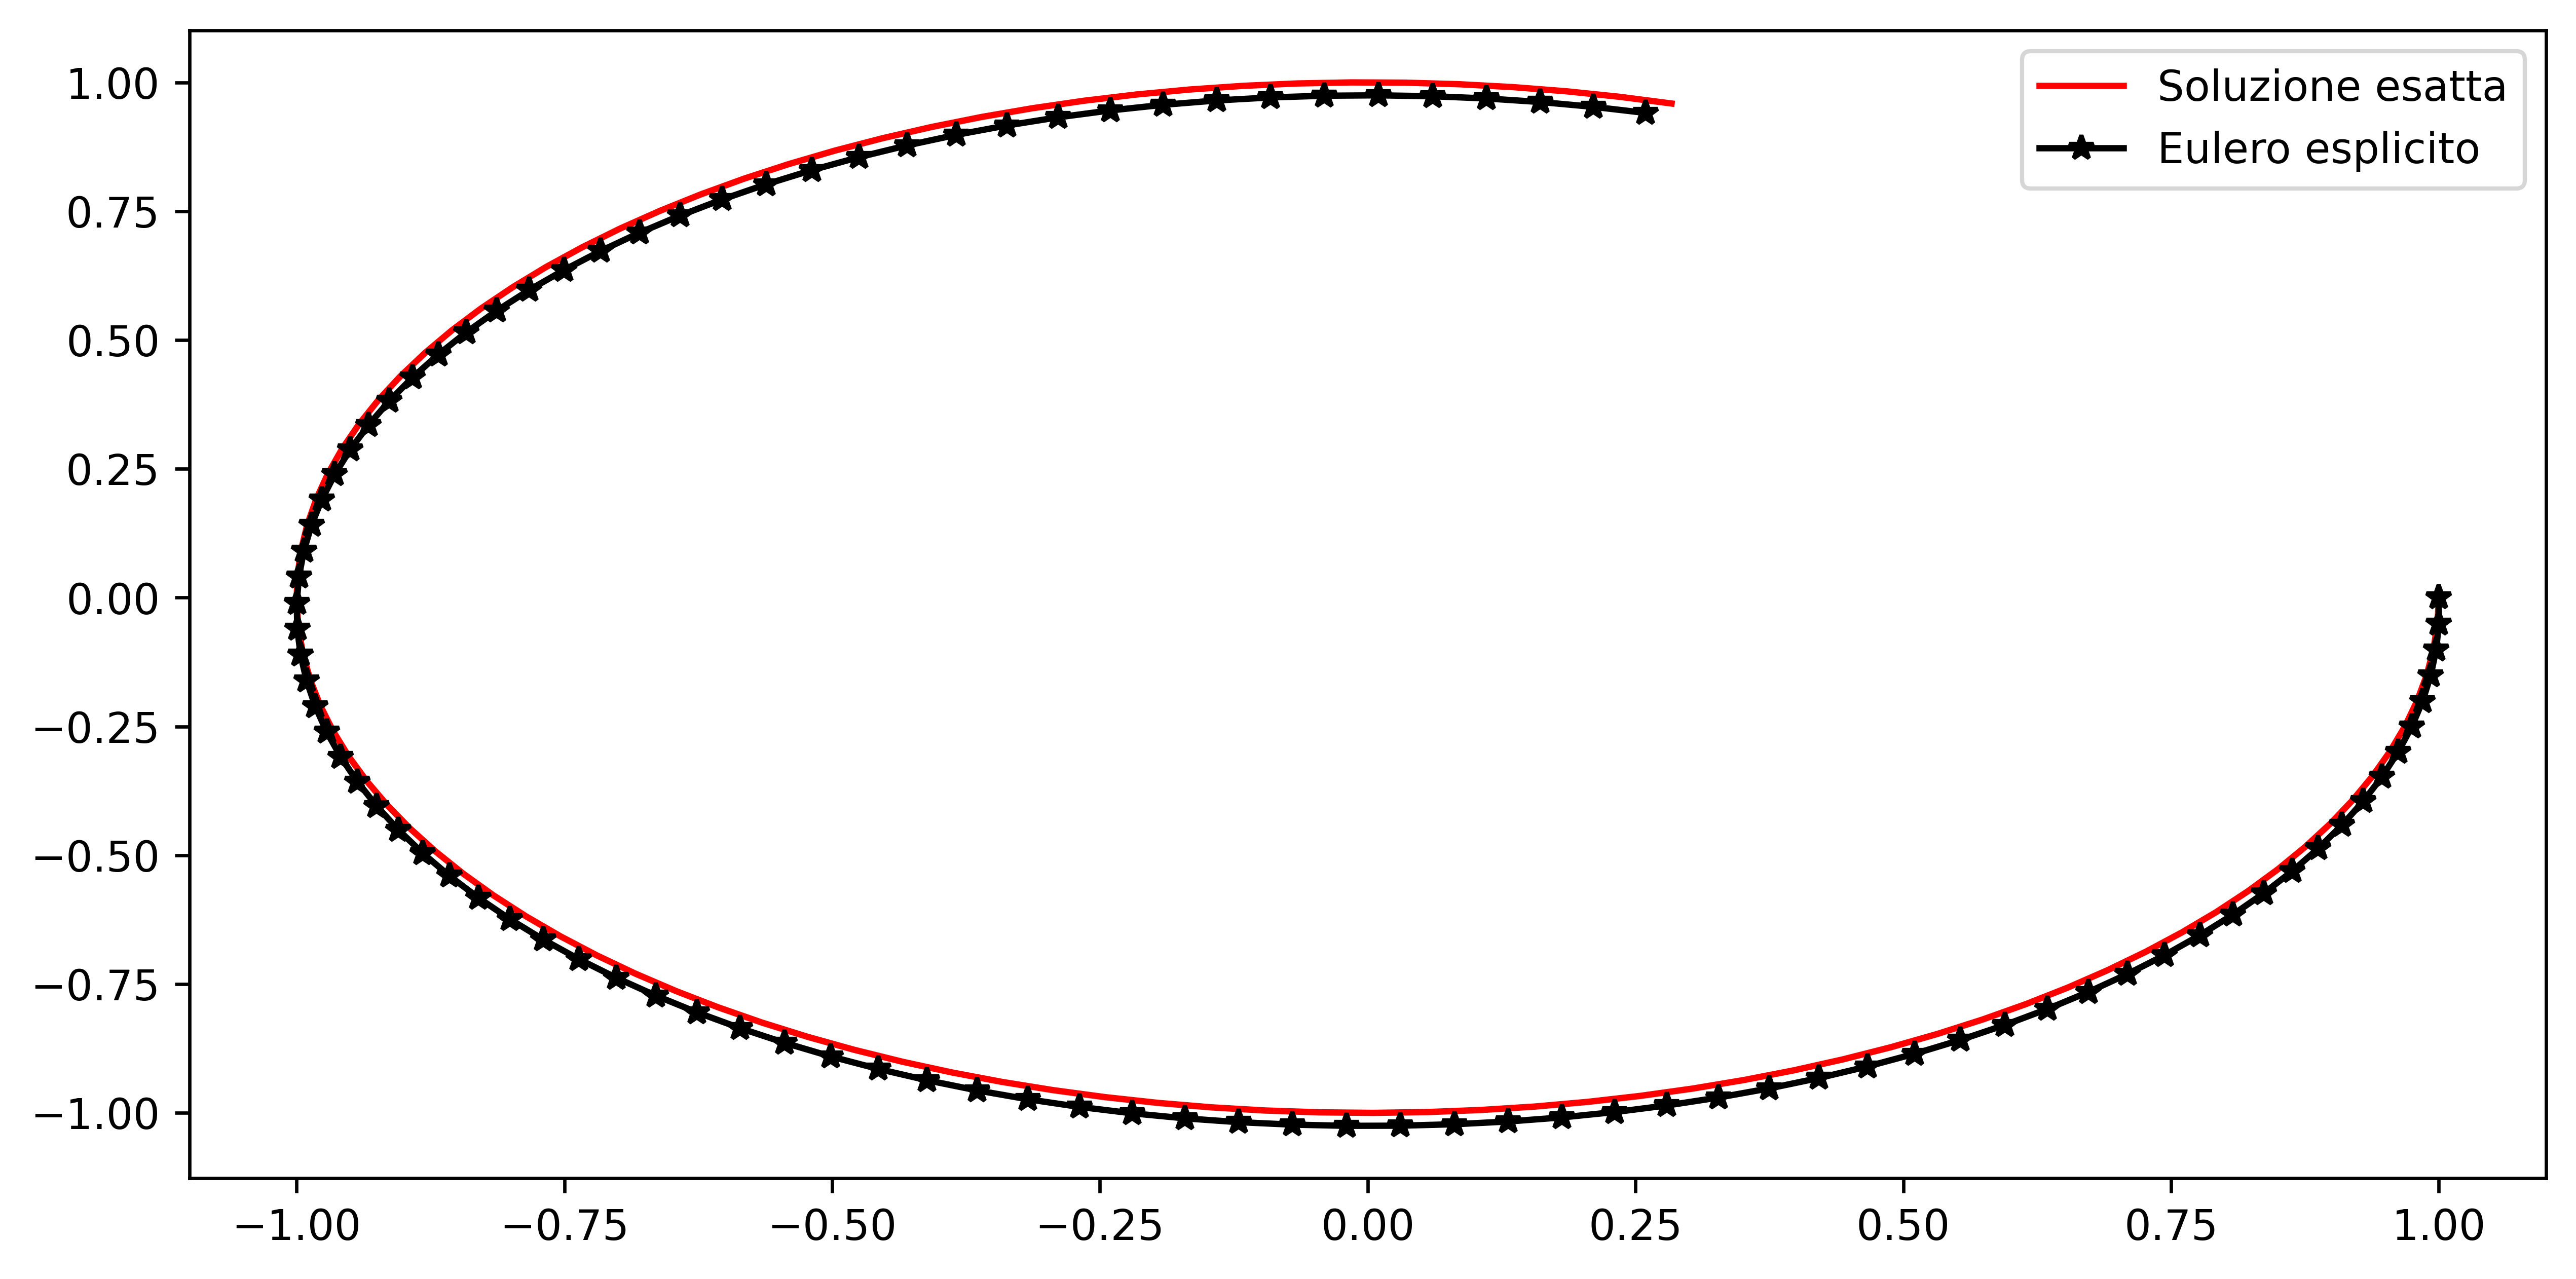

In [4]:
x0 = np.array([1.,0])
t = np.linspace(0,5,100)
sol = np.array([soluzione(t[i],x0) for i in range(len(t))])
solEulero = np.zeros_like(sol)
solEulero[0] = x0
h = t[1]-t[0]
for i in range(len(t)-1):
  solEulero[i+1] = solEulero[i] + h * campo(sol[i])

fig = plt.figure(figsize=(10,5),dpi=600)

plt.plot(sol[:,0],sol[:,1],'r-',label="Soluzione esatta")
plt.plot(solEulero[:,0],solEulero[:,1],'k-*',label="Eulero esplicito")
plt.legend()
plt.show()

### Metodo di Eulero Implicito

In [5]:
def newtonMethod(f,Jac,x0,tol=1e-10,max_it=100):
  resN = tol+1
  x = x0
  it=0
  while resN>tol and it<max_it:
    res = -np.linalg.solve(Jac(x),f(x))
    x = x + res
    resN = np.linalg.norm(f(x),2)
    it+=1
  
  return x

In [12]:
Jacobiana = lambda x : A

I = np.eye(2)

func = lambda xold,y : y - xold - h * campo(0.5*(y+xold))
Jac_y = lambda xold,y : I - h/2 * Jacobiana(0.5*(y+xold))

In [13]:
solEuleroImplicito = np.zeros_like(solEulero)
solEuleroImplicito[0] = x0
for i in range(len(t)-1):
  f = lambda y : func(solEuleroImplicito[i],y)
  J = lambda y: Jac_y(solEuleroImplicito[i],y)
  solEuleroImplicito[i+1] = newtonMethod(f,J,solEuleroImplicito[i])

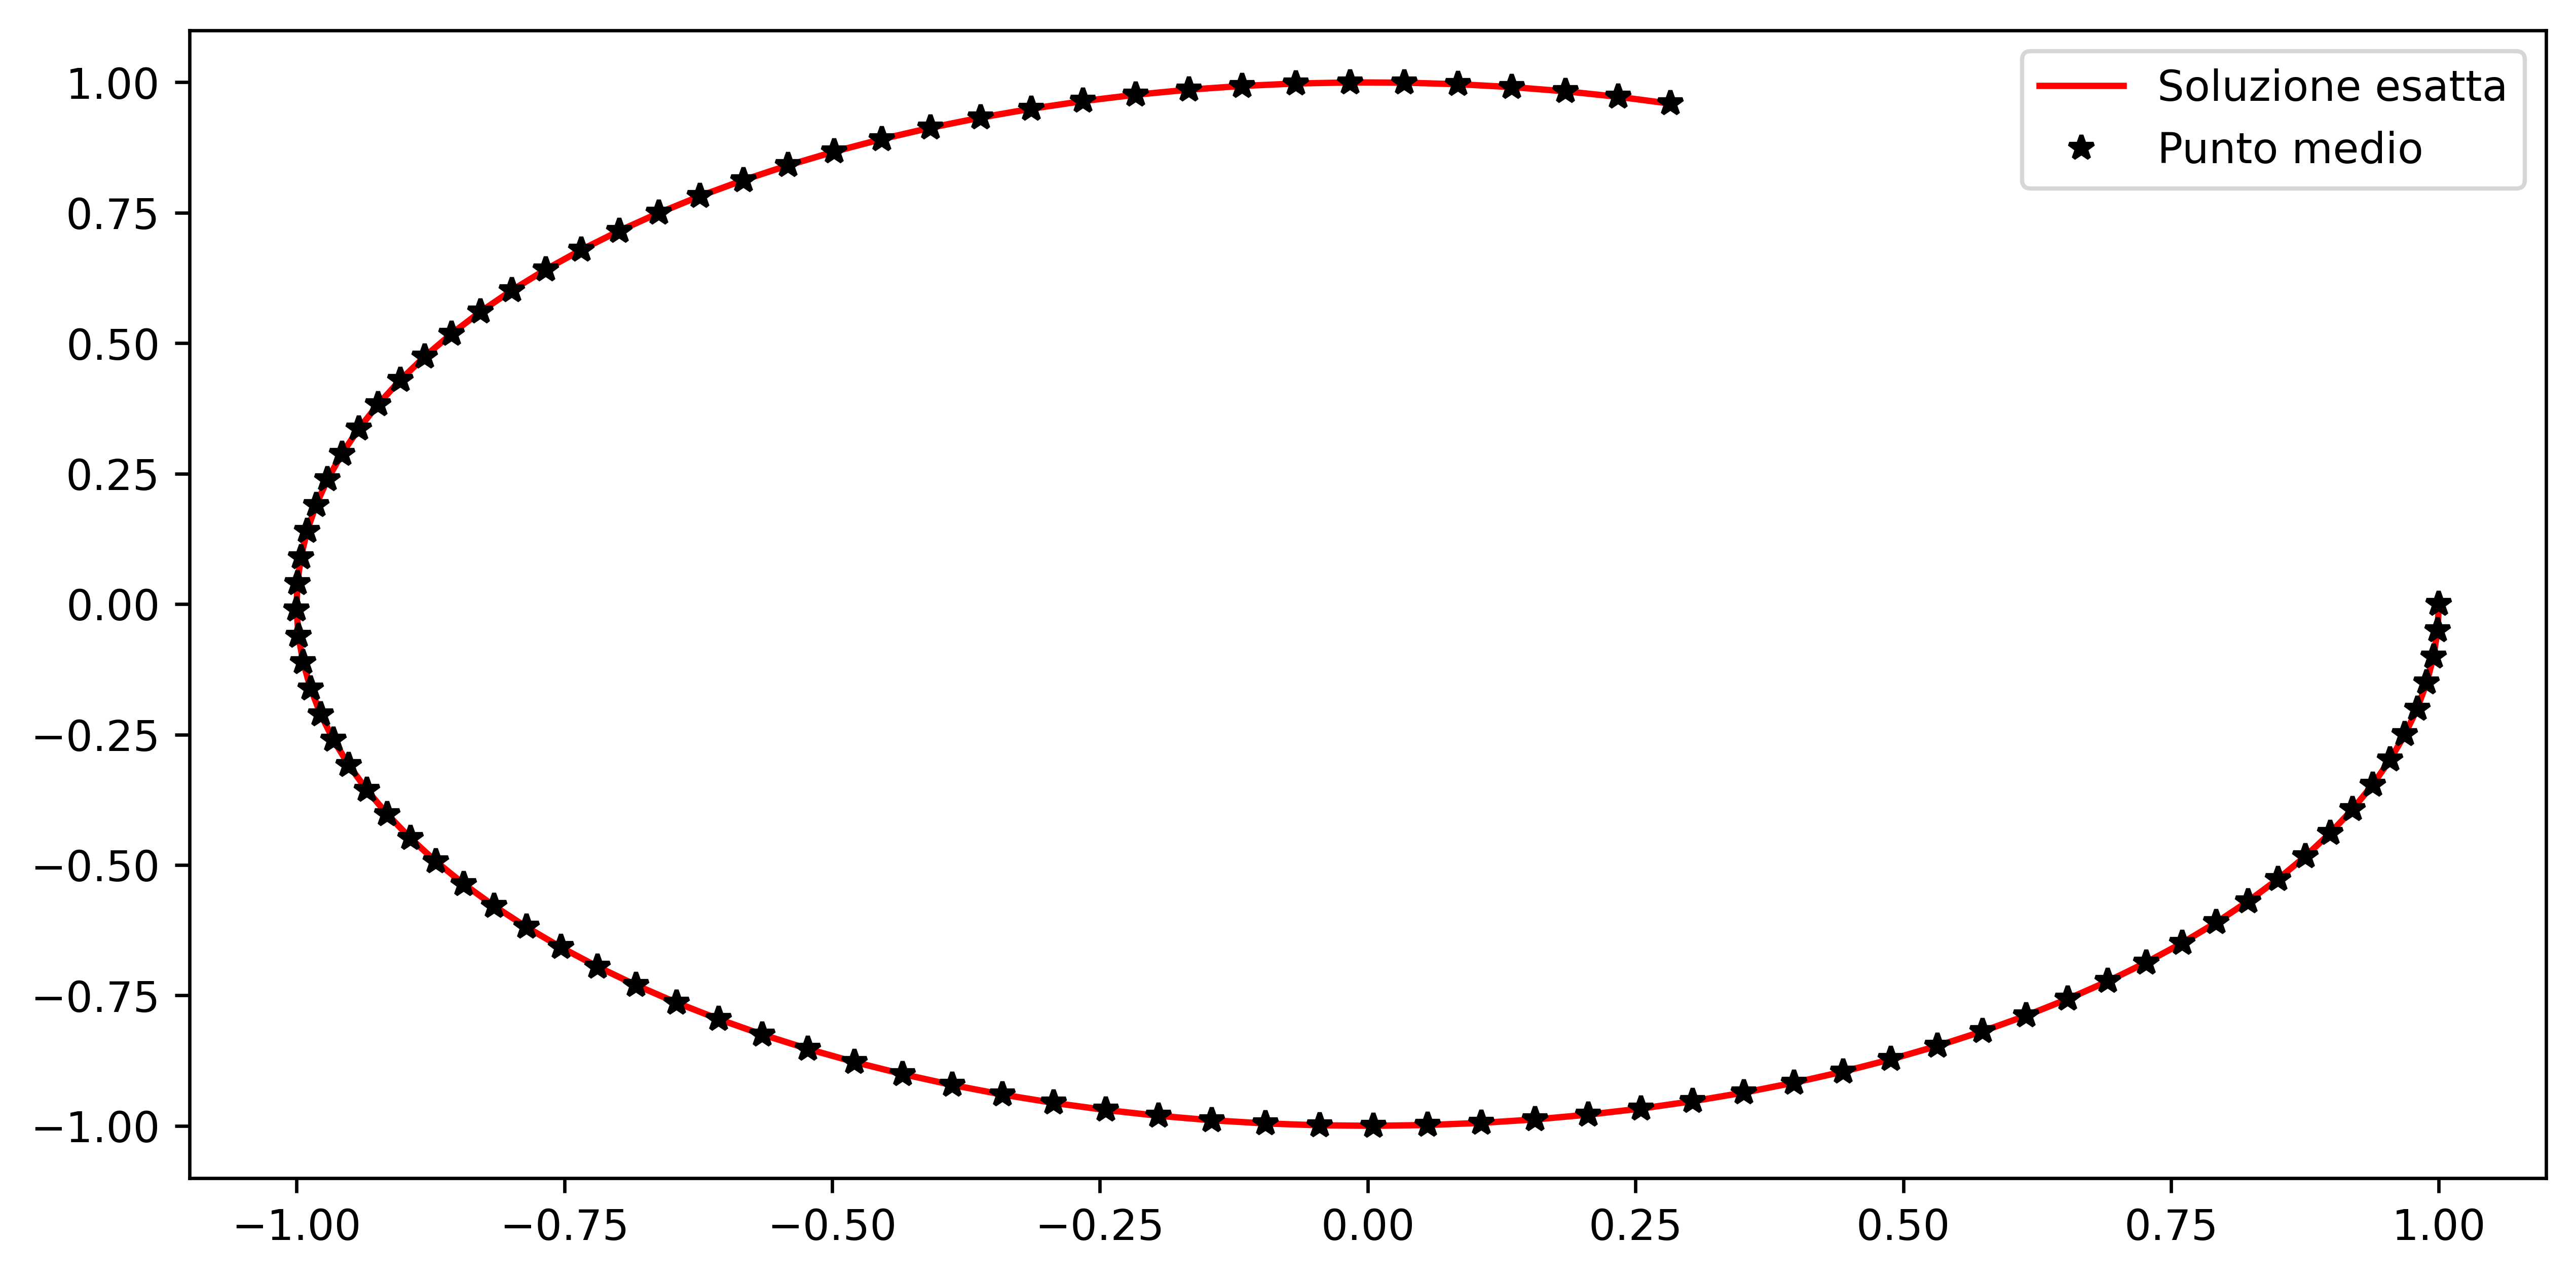

In [18]:
fig = plt.figure(figsize=(10,5),dpi=600)

plt.plot(sol[:,0],sol[:,1],'r-',label="Soluzione esatta")
plt.plot(solEuleroImplicito[:,0],solEuleroImplicito[:,1],'k*',label="Punto medio")
plt.legend()
plt.show()